In [1]:
# 数据集载地址https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

import urllib.request
import os
import tarfile

# 下载
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filepath = 'data/cifar-10-python.tar.gz'

# 文件不存在时下载
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print('downloaded: ', result )
else:
    # 文件已下载
    print('data file already exists.')
    
# 解压
if not os.path.exists('data/cifar-10-batches-py'):
    tfile = tarfile.open('data/cifar-10-python.tar.gz', 'r:gz')
    # 解压文件
    result = tfile.extractall('data/')
    print('extracted to ./data/cifar-10-batches-py/')
    
else :
    # 文件已解压
    print('Directory already extracted')
    
    

data file already exists.
Directory already extracted


# 导入CIFAR数据集

In [2]:
import pickle as p
import numpy as np

# load 一个batch
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        # 一个样本由标签和图像(32*32*3 = 3072)组成
        data_dict = p.load(f, encoding = 'bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        # 把原始数据调整为 bcwh ，每次1w条
        images = images.reshape(10000, 3,32,32)
        
        # tensorflow 处理图像的结构为bwhc，所以要把c移动到最后面
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        
        return images, labels
    
# load 所有batch
def load_CIFAR_data(data_dir):
    images_train = []
    labels_train = []
    # 样本集为50000。 我们分为5次，每次一万条
    for i in range(5):
        f = os.path.join(data_dir, 'data_batch_%d' %(i+1))
        print('loading...', f)
        # load_CIFAR_batch 获得批量图像及其对应的标签
        image_batch, label_batch = load_CIFAR_batch(f)
        
        images_train.append(image_batch)
        labels_train.append(label_batch)
        
        # 连接images 和labels 存入Xtrain和Ytrain中
        Xtrain = np.concatenate(images_train)
        Ytrain = np.concatenate(labels_train)
        
        del image_batch, label_batch
    
    Xtest, Ytest = load_CIFAR_batch(os.path.join(data_dir, 'test_batch'))
    print('finished loadding CIFAR-10 data')
    
    return Xtrain, Ytrain, Xtest, Ytest


# 走起
data_dir = 'data/cifar-10-batches-py/'
Xtrain, Ytrain, Xtest, Ytest = load_CIFAR_data(data_dir)
    
# 数据信息
print('training data shape: ', Xtrain.shape)
print('training labels shape: ', Ytrain.shape)
print('test data shape: ', Xtest.shape)
print('test labels shape: ', Ytest.shape)
    
        

loading... data/cifar-10-batches-py/data_batch_1
loading... data/cifar-10-batches-py/data_batch_2
loading... data/cifar-10-batches-py/data_batch_3
loading... data/cifar-10-batches-py/data_batch_4
loading... data/cifar-10-batches-py/data_batch_5
finished loadding CIFAR-10 data
training data shape:  (50000, 32, 32, 3)
training labels shape:  (50000,)
test data shape:  (10000, 32, 32, 3)
test labels shape:  (10000,)


2


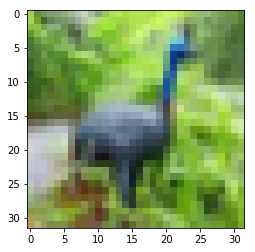

In [3]:
# 查看单项image 和label
%matplotlib inline
import matplotlib.pyplot as plt

# 查看image
plt.imshow(Xtrain[6])

# 查看label
# 对应的类别信息可以查看 http://www.cs.toronto.edu/~kriz/cifar.html
print(Ytrain[6])


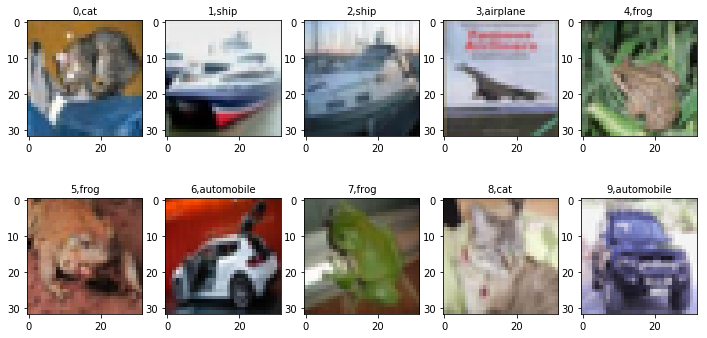

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# 查看多项images 和label
# 定义标签字典，每个数字对应的类别名称
label_dict = {
    0:"airplane",
    1:"automobile", 
    2:"bird", 
    3:"cat", 
    4:"deer", 
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship", 
    9:"trunk"}

# 定义显示图像数据及其对应标签的函数
def plot_images_labels_prediction(images, # 图像
                                  labels, # 标签
                                  prediction, #预测值
                                  idx, # 起始值
                                  num=10 # 显示图片数量
                                 ):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num = 10 
    for i in range(0, num):
        ax = plt.subplot(2,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        
        
        title = str(i) + ',' + label_dict[labels[idx]]
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[idx]]
        
        ax.set_title(title, fontsize=10)
        
        idx+=1
        
    plt.show()
        

# 显示图像数据及其对应的标签
plot_images_labels_prediction(Xtest, Ytest, [], 0, 10 )

In [5]:
# 数据预处理
# 查看第一个图像的第一个像素点
# 即 rgb值 0-255
Xtrain[0][0][0] 

array([59, 62, 63], dtype=uint8)

In [6]:
# 图像进行数字标准化
Xtrain_normalize = Xtrain.astype('float32') / 255.0
Xtest_normalize = Xtest.astype('float32') / 255.0

# 预处理后的像素信息
print(Xtrain_normalize[0][0][0] )

[ 0.23137255  0.24313726  0.24705882]


In [7]:
# Y标签从0-9 转成onehot
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

encoder.fit(yy)
Ytrain_reshape = Ytrain.reshape(-1,1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1,1)
Ytest_onehot = encoder.transform(Ytest_reshape)

print(Ytrain_onehot.shape)
print(Ytrain[:5])
print(Ytrain_onehot[:5])

(50000, 10)
[6 9 9 4 1]
[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


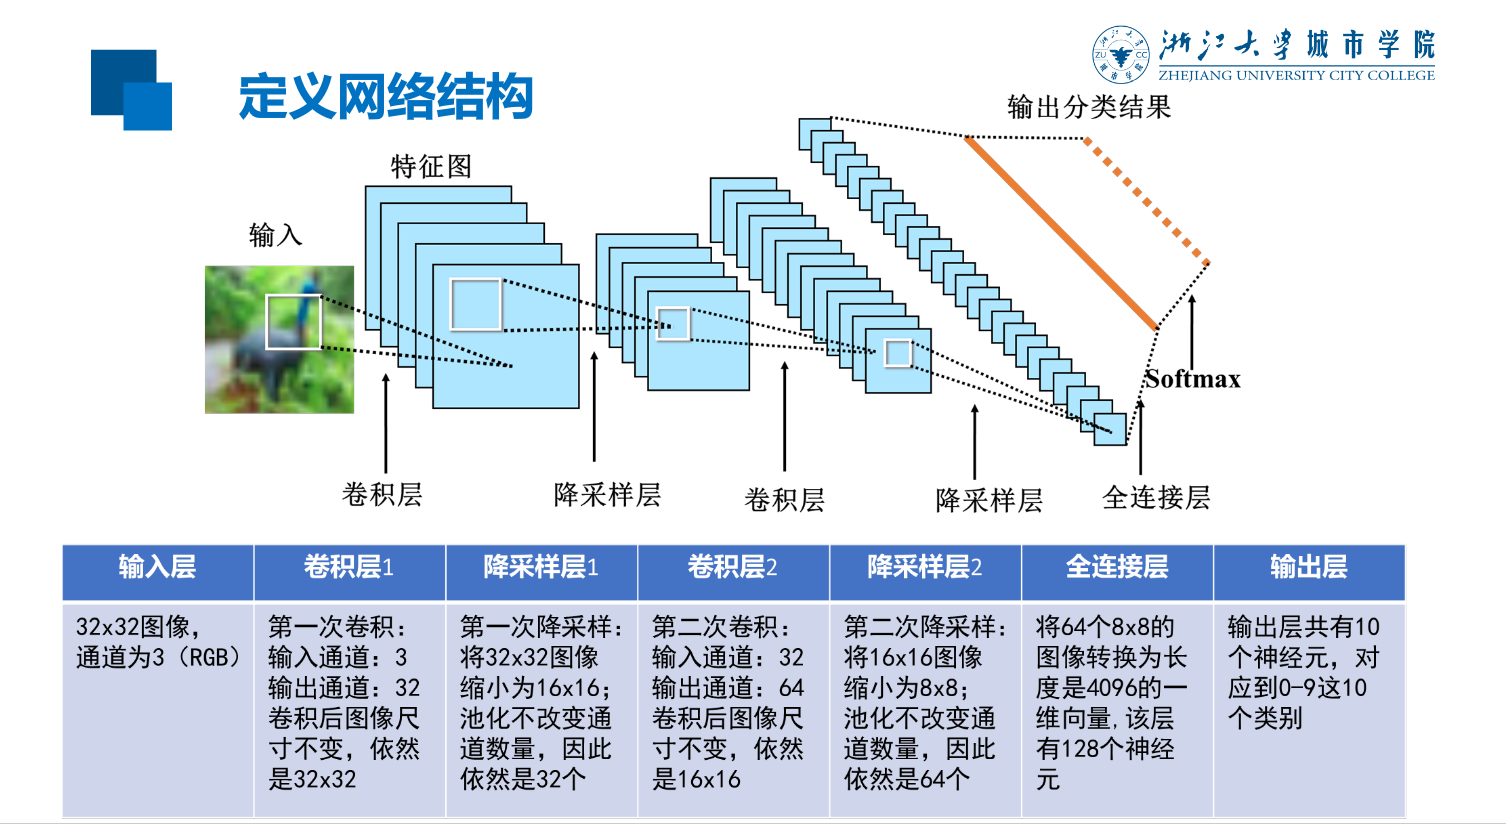

In [8]:
import tensorflow as tf
tf.reset_default_graph()
# 定义权值
def weight(shape):
    # 在构建模型时，需要使用tf.Variable 来创建一个变量
    # 在训练时，这个变量不断更新
    # 使用函数tf.truncated_noraml(截断正太分布)生成的标准差为0.1的随机数来初始化权值
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1), name='W')

# 定义偏置
# 初始化0.1
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

# 定义卷积操作
# 步长为1 padding = same
def conv2d(x,W):
    # tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, name=None)
    return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME')

# 定义池化操作
# 步长为2 ,即原始尺寸长宽各除以2
def max_pool_2x2(x):
    # tf.nn.max_pool(value, kszie, strides, padding , name=None)
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


In [9]:
# 定义网络结构
# 输入层 32 * 32 * 3
with tf.name_scope('input_layer'):
    x = tf.placeholder('float', shape=[None, 32, 32, 3], name='x')
    
# 第一个卷积层
# 输入通道3，输出通道32， 尺寸不变 依然是32 * 32 
with tf.name_scope('conv_1'):
    W1 = weight([3,3,3,32]) # [k_width, k_height, input_chn, output_chn]
    b1 = bias([32]) #  与output_chn一致
    
    conv_1 = conv2d(x,W1) + b1
    conv_1 = tf.nn.relu(conv_1)
    
# 第一个池化层
# 将32 * 32 缩小为 16 * 16，池化不改变通道数量，依然是32
with tf.name_scope('pool_1'):
    pool_1 = max_pool_2x2(conv_1)

# 第2个卷积层
# 输入通道 32 ， 输出通道64， 卷积后图像尺寸不变，依然是16 * 16 
with tf.name_scope('conv_2'):
    W2 = weight([3,3,32,64])
    b2 = bias([64])
    
    conv_2 = conv2d(pool_1, W2) + b2
    conv_2 = tf.nn.relu(conv_2)
    

# 第二个池化层
# 将16 * 16 缩小为 8 * 8，池化不改变通道数量，依然是64
with tf.name_scope('pool_2'):
    pool_2 = max_pool_2x2(conv_2)

# 全连接层
# 将 64个 8*8的图像转换为1维向量，长度是 64 * 8 * 8 = 4096 128个神经元
with tf.name_scope('fc'):
    W3 = weight([4096, 128])
    b3 = bias([128])
    
    flat = tf.reshape(pool_2, [-1, 4096])
    h = tf.nn.relu(tf.matmul(flat, W3) + b3)
    h_dropout = tf.nn.dropout(h, keep_prob = 0.8)

# 输出层
# 输出层有10个神经元， 对应0-9这10个类别
with tf.name_scope('output_layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    pred = tf.nn.softmax(tf.matmul(h_dropout, W4) + b4)
    




In [10]:
# 构建模型 这部分类似全连接神经网络
with tf.name_scope('optimizer'):
    # 定义占位符
    y = tf.placeholder("float", shape=[None, 10], name='label')
    # 定义损失函数
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    # 选择优化器,学习率0.0001
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)
    
with tf.name_scope("evaluation"):
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    

In [11]:
# 启动会话
import os 
from time import time
train_epochs = 60
batch_size = 50
total_batch = int(len(Xtrain)/batch_size)
epoch_list = []
accuracy_list = []
loss_list = []

epoch = tf.Variable(0, name ='epoch', trainable=False) #trainable = False 代表不可训练
startTime = time()

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
# 断点续训
ckpt_dir = 'CIFAR10_log/'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

# 生成saver
saver = tf.train.Saver(max_to_keep=1)

# 如果有检查点文件，读取最新的检查点文件，恢复各种变量值
ckpt = tf.train.latest_checkpoint(ckpt_dir)
if ckpt != None:
    saver.restore(sess, ckpt) # 加载所有的参数
    # 从里开始就可以直接使用模型进行预测，或者接着模型训练了
else :
    print('Training from scratch.')
    
# 获取续训参数
start = sess.run(epoch)
print('Training starts from {} epoch.'.format(start+1))



INFO:tensorflow:Restoring parameters from CIFAR10_log/CIFAR10_cnn_model.cpkt-25
Training starts from 25 epoch.


In [13]:
# 迭代训练 
# 每次从样本集和标签集中取出batchsize条（列表切片）
def get_train_batch(number, batch_size):
    return Xtrain_normalize[number * batch_size : (number+1)* batch_size], Ytrain_onehot[number * batch_size : (number+1)* batch_size]  


for ep in range(start, train_epochs):
    for i in range(total_batch):
        batch_x, batch_y = get_train_batch(i, batch_size)
        sess.run(optimizer , feed_dict={x:batch_x, y:batch_y})
        if i % 100 == 0:
            print('Step {}'.format(i), "finished")
            
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x:batch_x, y:batch_y})
    epoch_list.append(ep+1)
    loss_list.append(loss)
    accuracy_list.append(acc)

    print("Train epoch : ", '%2d'%(sess.run(epoch)+1), "loss=","{:.6f}".format(loss), "Accuracy=", acc)

    # 保存检查点
    saver.save(sess, ckpt_dir + 'CIFAR10_cnn_model.cpkt', global_step = ep+1)
    sess.run(epoch.assign(ep+1))
        
duration = time() - startTime
print('Train finied takes ',  duration)
        
        
        
        
            
            
            
            

Step 0 finished
Step 100 finished
Step 200 finished
Step 300 finished
Step 400 finished
Step 500 finished
Step 600 finished
Step 700 finished
Step 800 finished
Step 900 finished
Train epoch :  25 loss= 1.968331 Accuracy= 0.5
Step 0 finished
Step 100 finished
Step 200 finished
Step 300 finished
Step 400 finished
Step 500 finished
Step 600 finished
Step 700 finished
Step 800 finished
Step 900 finished
Train epoch :  26 loss= 1.933340 Accuracy= 0.52
Step 0 finished
Step 100 finished
Step 200 finished
Step 300 finished
Step 400 finished
Step 500 finished
Step 600 finished
Step 700 finished
Step 800 finished
Step 900 finished
Train epoch :  27 loss= 1.913565 Accuracy= 0.56
Step 0 finished
Step 100 finished
Step 200 finished
Step 300 finished
Step 400 finished
Step 500 finished
Step 600 finished
Step 700 finished
Step 800 finished
Step 900 finished
Train epoch :  28 loss= 1.929806 Accuracy= 0.54
Step 0 finished
Step 100 finished
Step 200 finished
Step 300 finished
Step 400 finished
Step 500 

### 优化方向
- 增加网络层数
- 增加迭代次数
- 增加全连接层数
- 增加全连接层神经元个数
- 数据扩增等等

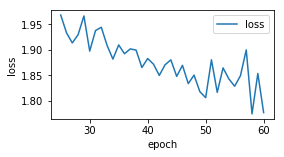

In [14]:
# 数据可视化
%matplotlib inline
import matplotlib.pyplot as plt 

# 损失函数
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')



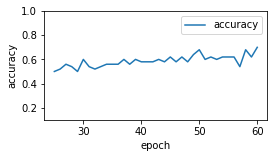

In [15]:

# 准确率
plt.plot(epoch_list, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.1,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [16]:

#评估模型及预测
test_total_batch = int(len(Xtest_normalize)/ batch_size)
test_acc_sum = 0.0
for i in range(test_total_batch):
    test_image_batch = Xtest_normalize[i*batch_size : (i+1)*batch_size]
    test_label_batch = Ytest_onehot[i*batch_size : (i+1)*batch_size]
    test_batch_acc = sess.run(accuracy , feed_dict = {x:test_image_batch, y:test_label_batch})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum/test_total_batch)
print('test accuracy :{:.6f}'.format(test_acc))
    

test accuracy :0.655400


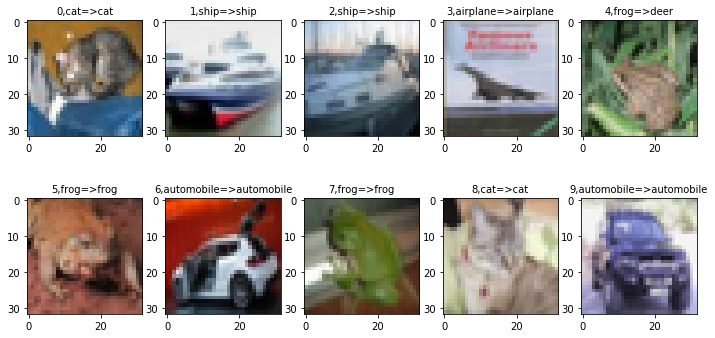

In [17]:
#利用模型进行预测
test_pred = sess.run(pred, feed_dict={x:Xtest_normalize[:10]})
prediction_result = sess.run(tf.argmax(test_pred,1))

plot_images_labels_prediction(Xtest, Ytest, prediction_result, 0,10)
